# Classification End-to-End Notebook
--------
In this notebook, we will make an E2E project using Titanic Tickets dataset, and using different methods we covered in the previous notebooks

## 1. Importing needed modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier as XGBoost
from sklearn.naive_bayes import GaussianNB as NB

from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

## 2. Reading Dataset

In [2]:
df = pd.read_csv('Data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Data Analysis

In [3]:
df.describe(include=['O'])

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [4]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Gender         False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Age'].isnull().sum()

177

In [7]:
df.Cabin.isnull().sum()

687

In [8]:
df.Embarked.isnull().sum()

2

In [9]:
unique_last_name = df.Name.apply(lambda x: x[0 : x.find(',')])
891 - len(np.unique(unique_last_name))

224

In [10]:
def find_prefix(x):
    st = x.find(',')
    if st == -1: # , doesn't exist
        st = 0
    else:
        st += 2
    
    en = x.find('.')
    if en == -1:
        en = len(x) # end of x
        
    return x[st:en]
        
        
prefix = df.Name.apply(find_prefix)
len(np.unique(prefix))

17

## 4. Data Cleaning

In [11]:
df = df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Fare'], axis='columns', errors='ignore')
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [12]:
df = df[df.Embarked.notna()]
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [13]:
df.Embarked.isnull().sum()

0

In [14]:
df.isnull().any()

Survived    False
Pclass      False
Gender      False
Age          True
SibSp       False
Parch       False
Embarked    False
dtype: bool

In [15]:
df.Gender = df.Gender.replace('male', 0)
df.Gender = df.Gender.replace('female', 1)
df.Gender = df.Gender.astype('uint8') # largest number to save is 2^8=256
df.dtypes

C:\Users\Radwa Khattab\anaconda3\envs\dev\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Survived      int64
Pclass        int64
Gender        uint8
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [16]:
mean_age = int(df.Age.mean())
df.Age = df.Age.fillna(mean_age)
df.Age.isnull().sum()

0

In [17]:
df.Age = df.Age.astype('int')
df.Age

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 889, dtype: int32

In [18]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,S
1,1,1,1,38,1,0,C
2,1,3,1,26,0,0,S
3,1,1,1,35,1,0,S
4,0,3,0,35,0,0,S
...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,S
887,1,1,1,19,0,0,S
888,0,3,1,29,1,2,S
889,1,1,0,26,0,0,C


In [19]:
df.dtypes

Survived     int64
Pclass       int64
Gender       uint8
Age          int32
SibSp        int64
Parch        int64
Embarked    object
dtype: object

In [20]:
np.unique(df.Embarked)

array(['C', 'Q', 'S'], dtype=object)

In [21]:
df.Embarked = df.Embarked.replace('C', 0)
df.Embarked = df.Embarked.replace('Q', 1)
df.Embarked = df.Embarked.replace('S', 2)
df.Embarked = df.Embarked.astype('uint8')
df.Embarked

C:\Users\Radwa Khattab\anaconda3\envs\dev\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: uint8

In [22]:
df.dtypes

Survived    int64
Pclass      int64
Gender      uint8
Age         int32
SibSp       int64
Parch       int64
Embarked    uint8
dtype: object

In [23]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Embarked
0,0,3,0,22,1,0,2
1,1,1,1,38,1,0,0
2,1,3,1,26,0,0,2
3,1,1,1,35,1,0,2
4,0,3,0,35,0,0,2
...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,2
887,1,1,1,19,0,0,2
888,0,3,1,29,1,2,2
889,1,1,0,26,0,0,0


## 5. Data Splitting & Normalization
In case we wouldn't use cross validation

In [24]:
X = df.drop('Survived', axis='columns')
y = df.Survived

print(X.shape)
print(y.shape)

# y = np.expand_dims(y, 1)

print(y.shape)

(889, 6)
(889,)
(889,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(711, 6)
(178, 6)
(711,)
(178,)


In [26]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) # mean, st. dev. for X_train
X_test = sc_X.transform(X_test)

X_train

array([[ 0.81524955,  1.37059933, -0.05790574, -0.47800535,  2.01325947,
        -1.93545007],
       [ 0.81524955,  1.37059933, -0.91078862, -0.47800535,  0.76962134,
        -1.93545007],
       [-1.59490609, -0.72960783,  1.18265117, -0.47800535, -0.47401678,
         0.58719887],
       ...,
       [ 0.81524955,  1.37059933,  1.18265117, -0.47800535,  0.76962134,
        -1.93545007],
       [ 0.81524955, -0.72960783,  0.25223349, -0.47800535, -0.47401678,
        -1.93545007],
       [-1.59490609,  1.37059933,  0.48483791,  0.47935185,  2.01325947,
         0.58719887]])

## (Extra) Visualization of features with label from all data

[0 1]


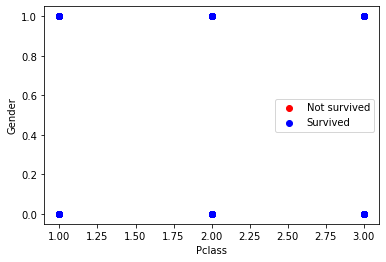

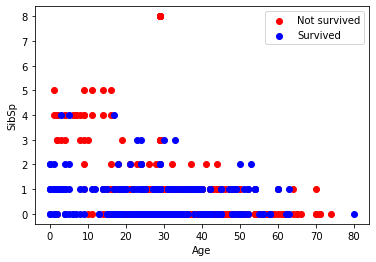

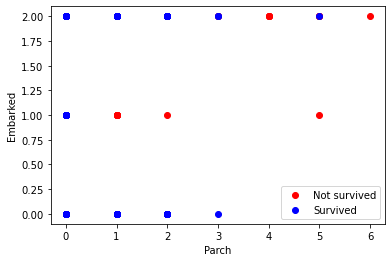

In [27]:
# print(X.columns)
labels = np.unique(y)
print(labels)

for i in range(0, 6, 2):
    col_name1 = X.columns[i]
    col_name2 = X.columns[i+1]
#     print(X.loc[:, col_name1].shape)
#     print(X.loc[:, col_name2].shape)
    
    X1_X2 = np.vstack((X.loc[:, col_name1], X.loc[:, col_name2])).T
#     print(X1_X2.shape)
    
    X1_X2_label0 = X1_X2[y == 0]
    X1_X2_label1 = X1_X2[y == 1]
    
    assert len(X1_X2_label0) + len(X1_X2_label1) == len(y)
    
    plt.scatter(X1_X2_label0[:,0], X1_X2_label0[:,1], color='red', label='Not survived')
    plt.scatter(X1_X2_label1[:,0], X1_X2_label1[:,1], color='blue', label='Survived')
    plt.xlabel(col_name1)
    plt.ylabel(col_name2)
    plt.legend()
    plt.show()

## 6. Model Building
----
Choices are:
- Logistic Regression
- KNN Model
- SVM Model
- Decision Tree Classifier
- Random Forest Classifier
- Naive Bayes

In [28]:
model1 = LogisticRegression()
model1 = model1.fit(X_train, y_train)

model2 = KNN(n_neighbors=5)
model2 = model2.fit(X_train, y_train)

model3 = SVC(kernel='rbf')
model3 = model3.fit(X_train, y_train)

model4 = DecisionTreeClassifier(max_depth=5)
model4 = model4.fit(X_train, y_train)

model5 = RandomForestClassifier(max_depth=7, n_estimators=100)
model5 = model5.fit(X_train, y_train)

model6 = NB()
model6 = model6.fit(X_train, y_train)

In [29]:
ypred1 = model1.predict(X_test)
ypred2 = model2.predict(X_test)
ypred3 = model3.predict(X_test)
ypred4 = model4.predict(X_test)
ypred5 = model5.predict(X_test)
ypred6 = model6.predict(X_test)

In [30]:
print('Logistic Regression RMSE = %.5f' % mean_squared_error(y_test, ypred1, squared=True))
print('KNN RMSE = %.5f' % mean_squared_error(y_test, ypred2, squared=True))
print('SVM RMSE = %.5f' % mean_squared_error(y_test, ypred3, squared=True))
print('Decision Tree RMSE = %.5f' % mean_squared_error(y_test, ypred4, squared=True))
print('Random Forest RMSE = %.5f' % mean_squared_error(y_test, ypred5, squared=True))
print('Naive Bayes RMSE = %.5f' % mean_squared_error(y_test, ypred6, squared=True))

Logistic Regression RMSE = 0.23034
KNN RMSE = 0.20787
SVM RMSE = 0.19101
Decision Tree RMSE = 0.18539
Random Forest RMSE = 0.19101
Naive Bayes RMSE = 0.23034


In [31]:
print('Logistic Regression Accuracy = %.2f%%' % model1.score(X_test, y_test))
print('KNN Accuracy = %.2f%%' % model2.score(X_test, y_test))
print('SVM Accuracy = %.2f%%' % model3.score(X_test, y_test))
print('Decision Tree Accuracy = %.2f%%' % model4.score(X_test, y_test))
print('Random Forest Accuracy = %.2f%%' % model5.score(X_test, y_test))
print('Naive Bayes Accuracy = %.2f%%' % model6.score(X_test, y_test))

Logistic Regression Accuracy = 0.77%
KNN Accuracy = 0.79%
SVM Accuracy = 0.81%
Decision Tree Accuracy = 0.81%
Random Forest Accuracy = 0.81%
Naive Bayes Accuracy = 0.77%


## 7. Optimization Methods:
------------
Choices arE:
- Grid Search
- Cross Validation
- Ensembling (XGBoost)

In [32]:
# TO DO Grid Search

In [33]:
# TO DO Cross Validation 

In [34]:
# XGBoost
model7 = XGBoost()
model7 = model7.fit(X_train, y_train)

## 8. Evaluating the Model

In [35]:
ypred7 = model7.predict(X_test)
print('XGBoost RMSE = %.5f' % mean_squared_error(y_test, ypred7, squared=True))
print('XGBoost Accuracy = %.2f%%' % model7.score(X_test, y_test))

XGBoost RMSE = 0.19101
XGBoost Accuracy = 0.81%
